# Notebook Context

## Question:
<font size="5">
Is there any benefit in training a model for liver/tumor segmentation on polar coordinates compared to training the model on carthesian coordinates?
</font>

## Answer:
<font size="5">
1. It is more beneficial to train a model for tumor segmentation on polar coordinates as it results in an overall higher dice score per volume. However it has to be considered the initial state the model starts the training from.<br>
2. The tumor segmentation model will perform better if initialized with a model pretrained on polar coordinates compared to initializing with a model pretrained on carthesian coordinates.
</font>


In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
def load_experiment_config(experiment_config_path):
    experiment_config = pkl.load(open(experiment_config_path, "rb"))
    pprint(experiment_config)
    return experiment_config

In [3]:
def load_experiment_data(experiment_data_path):
    experiment_history = pd.read_csv(experiment_data_path, header=0)
    pprint(experiment_history.columns)
    return experiment_history    

In [4]:
def extract_training_coordinates(experiment_config):
    if "polar_training" not in experiment_config["training_config"].keys():
        training_coodinates = "carthesian"
    elif experiment_config["training_config"]["polar_training"]:
        training_coodinates = "polar"
    else:
        training_coodinates = "carthesian"
    
    return training_coodinates

# Liver Segmentation Performance

## Single experiment

In [41]:
def plot_train_val_metrics(experiment_config, experiment_data, train_metric_names, val_metric_names):
    
    best_metrics = {}
    plt.figure(figsize=(10, 7))
    
    for train_metric_name, val_metric_name in zip(train_metric_names, val_metric_names):
        plt.plot(experiment_data[train_metric_name], label=train_metric_name)
        plt.plot(experiment_data[val_metric_name], label=val_metric_name)
        best_metrics[train_metric_name] = np.round(experiment_data[train_metric_name].max(), 4)
        best_metrics[val_metric_name] = np.round(experiment_data[val_metric_name].max(), 4)

    training_coordinates = extract_training_coordinates(experiment_config)
    
    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(start, end, step=0.01))
    plt.title(f"Model trained on {training_coordinates} coordinates")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend()

In [15]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/set_2/liver/experiment_4/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
liver_experiment_config_4 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
liver_experiment_history_4 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

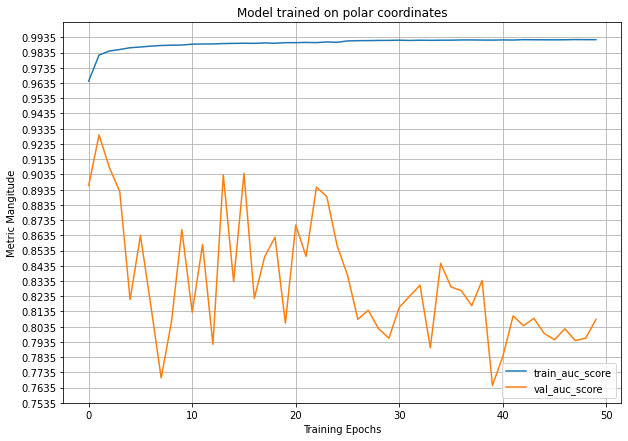

In [42]:
plot_train_val_metrics(
    experiment_config=liver_experiment_config_4,
    experiment_data = liver_experiment_history_4,
    train_metric_names=["train_auc_score"],
    val_metric_names=["val_auc_score"]
)

## Cross Experiments

In [38]:
def plot_cross_experiments_metrics(experiment_configs, experiments_data, metric_names):
    
    plt.figure(figsize=(10, 7))
    
    for metric_name in metric_names:
        for config, experiment in zip(experiment_configs, experiments_data):
            training_coordinates = extract_training_coordinates(config)
            plt.plot(experiment[metric_name], label=f"{metric_name} - {training_coordinates} coordinates")
    
    plt.grid("on")
    start, end = plt.ylim()
    plt.yticks(np.arange(start, end, step=0.01))
    plt.title(f"Cross-Model Comparison with different training coordinates")
    plt.xlabel("Training Epochs")
    plt.ylabel("Metric Mangitude")
    plt.legend(ncol=2)

In [17]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/set_1/liver/experiment_1/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
liver_experiment_config_1 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
liver_experiment_history_1 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'hflip', 'vflip'],
  

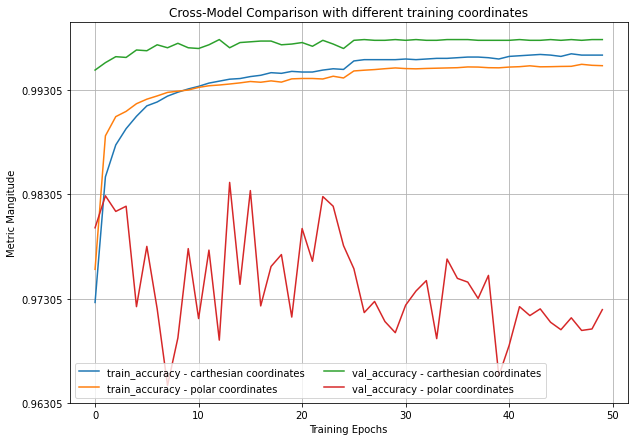

In [43]:
plot_cross_experiments_metrics(
    experiment_configs=[liver_experiment_config_1, liver_experiment_config_4],
    experiments_data=[liver_experiment_history_1, liver_experiment_history_4],
    metric_names=["train_accuracy", "val_accuracy"]
    )

## To clarify:

<b>
1.Why are some of the validation metrics (dice, iou, recall, val_auc_score) of the polar model for the liver segmentation on a decreasing trend compared to the carthesian model? The model trained on polar coordinates is expected to perform better

2.Why is it that in some cases the validation metric is better than the training metric? (specificity, accuracy - for the carthesian model)
</b>

# Lesion Segmentation Performance

## Single Experiment - Lesion segmentation model initialized from liver segmentation model trained on polar coordinates (which performed worse than the carthesian trained model)

In [19]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/set_2/lesion/experiment_4/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_4 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
lesion_experiment_history_4 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

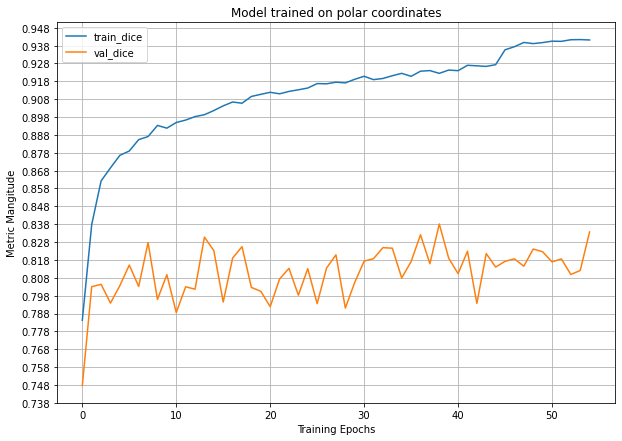

In [44]:
plot_train_val_metrics(
    experiment_config=lesion_experiment_config_4,
    experiment_data = lesion_experiment_history_4,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

## Single Experiment - Lesion segmentation model initialized from liver segmentation model trained on carthesian coordinates (which performed better than the polar trained model)

In [21]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/set_2/lesion/experiment_5/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_5 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
lesion_experiment_history_5 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

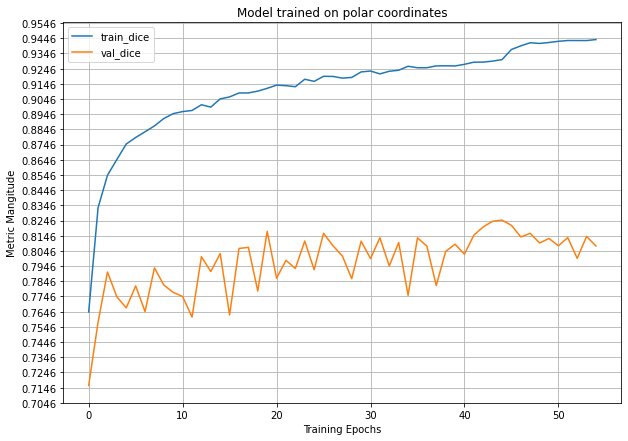

In [45]:
plot_train_val_metrics(
    experiment_config=lesion_experiment_config_5,
    experiment_data = lesion_experiment_history_5,
    train_metric_names=["train_dice"],
    val_metric_names=["val_dice"]
)

### Conclusion

The model for lesion segmentation initialized with a model trained for liver segmentation on polar coordinates is more performant than the model for lesion segmentation initialized with a model trained for liver segmentation on carthesian coordinates.

### Next steps:
Increase performance of the liver segmentation model trained on polar coordinates to maximize the performance of the model for lesion segmentation that will be initialized with the weights of the this trained liver segmentation model.

## Cross Experiments

In [46]:
EXPERIMENTS_ROOT_PATH = "../experiments_data/set_1/lesion/experiment_1/"
EXPERIMENT_CONFIG_NAME = "experiment_config.pkl"
EXPERIMENT_HISTORY_NAME = "experiment_history.csv"

# Load experiment config
lesion_experiment_config_1 = load_experiment_config(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_CONFIG_NAME))

# Load experiment_history
lesion_experiment_history_1 = load_experiment_data(os.path.join(EXPERIMENTS_ROOT_PATH, EXPERIMENT_HISTORY_NAME))

{'device': 'cuda',
 'model_config': {'backbone': 'base',
                  'block_type': 'base',
                  'channels': 1,
                  'dilation': [1, 1, 1, 1, 1],
                  'dilation_up': [1, 1, 1, 1, 1],
                  'dropout': 0,
                  'filter_sizes': [20, 40, 80, 160, 320, 640],
                  'filter_sizes_up': [20, 40, 80, 160, 320, 640],
                  'filter_start': 20,
                  'filter_start_up': 20,
                  'init_type': 'he_n',
                  'model_name': 'vUnet2D',
                  'se_reduction': 0,
                  'structure': [3, 3, 3, 3, 3],
                  'structure_up': [3, 3, 3, 3, 3],
                  'up_conv_type': [4, 2, 1],
                  'use_auxiliary_inputs': False,
                  'use_batchnorm': True,
                  'use_conv_pool': True,
                  'use_pypool': False},
 'training_config': {'Training_ROI_Vicinity': 4,
                     'augment': ['rot', 'zoom', 'h

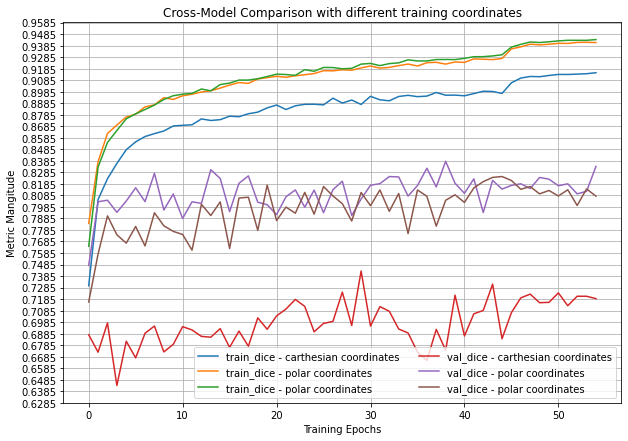

In [49]:
plot_cross_experiments_metrics(
    experiment_configs=[lesion_experiment_config_1, lesion_experiment_config_4, lesion_experiment_config_5],
    experiments_data=[lesion_experiment_history_1, lesion_experiment_history_4, lesion_experiment_history_5],
    metric_names=["train_dice", "val_dice"]
    )